In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]


In [66]:
df = pd.read_pickle('data/prop_data_gap_12_4_1.pkl').drop_duplicates()

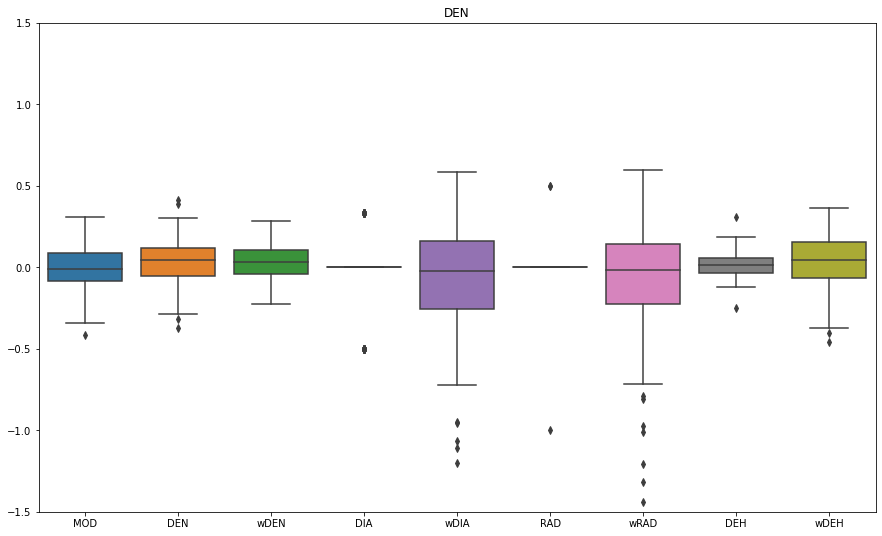

In [95]:
# --------- FILTERING ------------
reps_discarded = [20,41]
exp = 'DEN'
df_filt = df.loc[(df.time_win==3600*1) & 
                 (df.max_gap==20) & 
                (df.exp.isin([exp+'a',exp+'b'])) & 
                (~df.rep.isin(reps_discarded))]
df_filt.insert(4,'h', [int(str(a)[-8:-6]) for a in df_filt.start])

df_filt = df_filt.sort_values(['rep','h'])




# ---- dataframe of relative difference---- 
p = df_filt.columns[9:]
df_rd = (df_filt[p].diff()/df_filt[p]).iloc[1::2]
df_rd.insert(0,'rep', df_filt.rep.iloc[1::2])
df_rd.insert(1,'exp', [a[0:3] for a in df_filt.exp.iloc[1::2]])
df_rd.insert(3,'start-b', list(df_filt.start.iloc[1::2]))

boxplot = sns.boxplot(data=df_rd[p[:-1]])
plt.ylim([-1.5,1.5])
fig = plt.title(exp)



In [84]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_rd)
    

    

     rep  exp       MOD             start-b       DEN      wDEN  DIA  \
93    15  DEN -0.011136 2021-09-12 09:00:00  0.032944   0.04353  0.0   
94    15  DEN -0.323049 2021-09-12 13:00:00  0.173413  0.148903  0.0   
95    15  DEN  0.097627 2021-09-12 17:00:00 -0.025954  0.096937  0.0   
189   18  DEN  0.122479 2021-10-04 09:00:00  0.035832  0.169325  0.0   
190   18  DEN  0.128221 2021-10-04 13:00:00   0.03422  0.174299  0.0   
191   18  DEN  0.233396 2021-10-04 17:00:00 -0.087906  0.147447  0.0   
349   23  DEN  0.006987 2021-10-10 09:00:00 -0.021844 -0.024781  0.0   
350   23  DEN  0.060081 2021-10-10 13:00:00 -0.027121 -0.015498  0.0   
351   23  DEN  0.152173 2021-10-10 17:00:00 -0.067945  0.027658  0.0   
445   26  DEN  0.164024 2021-10-18 09:00:00  0.031117   0.05726  0.0   
446   26  DEN -0.057837 2021-10-18 13:00:00    0.0464  0.072143  0.0   
447   26  DEN  0.103336 2021-10-18 17:00:00  0.014118  0.043201  0.0   
541   29  DEN  0.151442 2021-10-22 09:00:00 -0.035493  0.063359 

In [ ]:
# Plot properties 
